# Titanic Data Exploration and Imputation Lab

In this lesson we will learn:
1. How to **acquire data from a github url**
2. Understand what **Imputation** is and use it for the titanic dataset
3. Understand what **Feature Engineering** is and create new features.



## Titanic Dataset Data Dictionary
The following information will help us understand what the values for various features mean:

- Survived: 0 = No, 1 = Yes  
- Pclass: 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class  
- Sex: male, female  
- Age: Age in years  
- SibSp: # of siblings/spouses aboard  
- Parch: # of parents/children aboard  
- Fare: Passenger fare  
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  


# Let us first load necessary libraries

In [10]:


# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")



# Load Dataset from GitHub

In [11]:
# --- 2. Load Dataset from GitHub ---
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview Data

In [12]:
# Preview data
print(df.head())
print("\nShape:", df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

S

# Explore Missing Values

In [13]:
# --- 3. Explore Missing Values ---
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Visualize missing values in Age

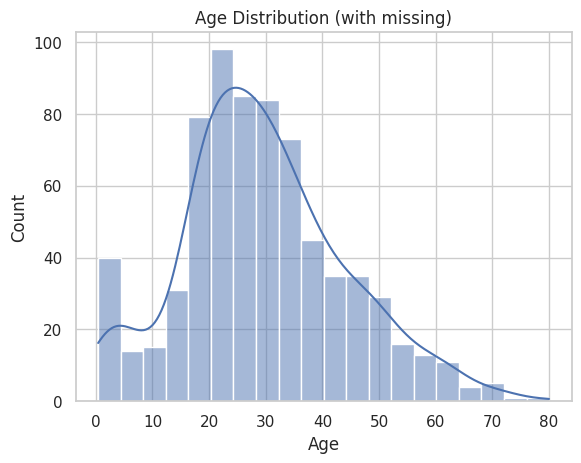

In [14]:
# Visualize missing values in Age
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution (with missing)")
plt.show()

# What is Imputation?

**Imputation** in data science means filling in missing data values with reasonable substitutes so that we can use the dataset for analysis or modeling.

For example, in the Titanic dataset, many passengers don’t have an Age recorded. If we try to run calculations or train a model with missing values, most algorithms will either throw errors or ignore those rows. Instead of losing data, we can “impute” (replace) the missing ages.

# Why not fill with zero?

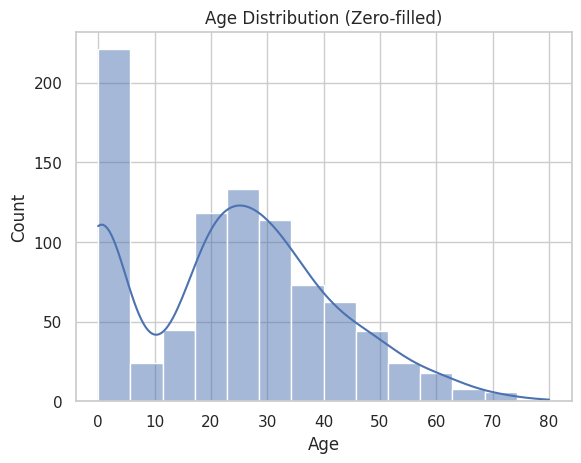

In [15]:
# --- 4. Why not fill with zero? ---
# Example: Zero would create an artificial spike at 0, unrealistic ages
zero_filled = df["Age"].fillna(0)
sns.histplot(zero_filled, kde=True)
plt.title("Age Distribution (Zero-filled)")
plt.show()

# Common Imputation Methods

1. Simple fills:

- Replace missing Age with mean or median of all known ages.  
- Replace missing Fare with median fare.  
- Replace missing categorical values (like Embarked) with the most common category.

2. Conditional imputation

- Fill missing Age with median age of passengers in the same Pclass or Title (“Mr.”, “Mrs.”, etc.).
- This makes imputations more realistic.

3. Predictive imputation (advanced)

Use another machine learning model (e.g., KNN or regression) to predict the missing value based on other attributes.

## Why is imputation important?

- Keeps as much data as possible (instead of dropping rows).
- Prevents bias that might occur if missing values are not random.
- Allows algorithms (like logistic regression, decision trees, etc.) to run smoothly.


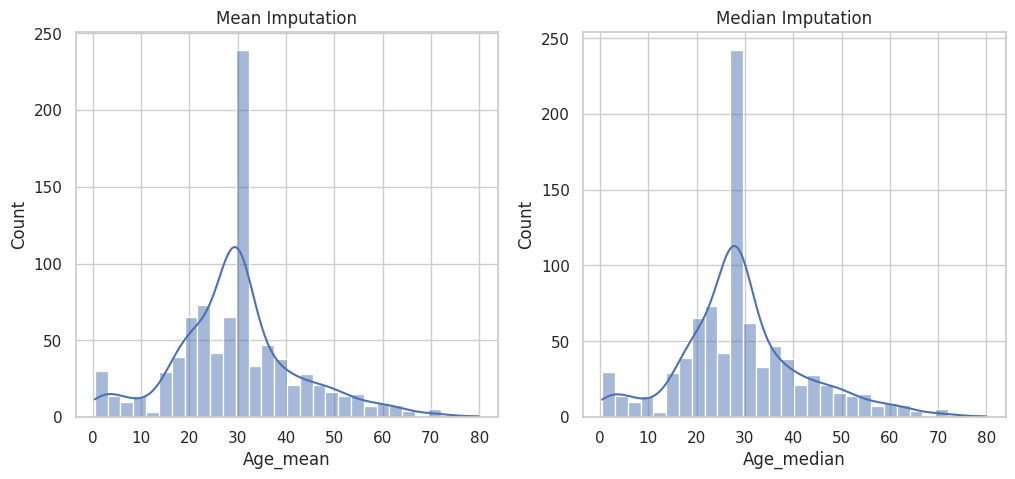

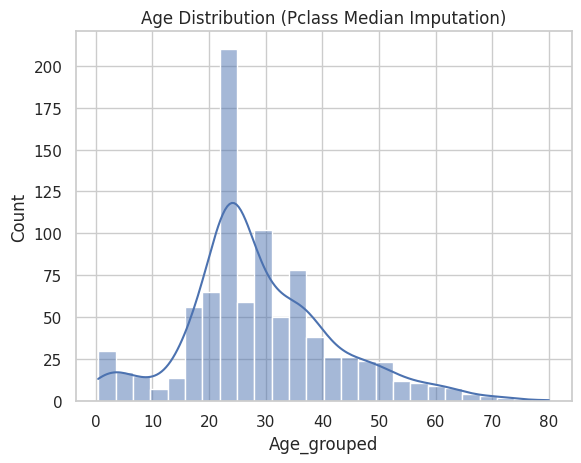

In [16]:
# --- 5. Better strategies ---
# Option 1: Fill with mean
mean_age = df["Age"].mean()
df["Age_mean"] = df["Age"].fillna(mean_age)

# Option 2: Fill with median
median_age = df["Age"].median()
df["Age_median"] = df["Age"].fillna(median_age)

# Compare plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df["Age_mean"], kde=True, ax=axes[0])
axes[0].set_title("Mean Imputation")
sns.histplot(df["Age_median"], kde=True, ax=axes[1])
axes[1].set_title("Median Imputation")
plt.show()

# --- 6. Slightly Advanced: Fill based on Pclass ---
# Passengers in different classes may have different age profiles
df["Age_grouped"] = df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.median()))
sns.histplot(df["Age_grouped"], kde=True)
plt.title("Age Distribution (Pclass Median Imputation)")
plt.show()

# What is Feature Engineering?

**Feature engineering** is the process of creating new useful variables (features) from the existing data to help our analysis or models perform better.

Think of features as the ingredients in a recipe. Sometimes the raw ingredients (like Age, Fare, SibSp) are not enough. By combining or transforming them, we can create new “ingredients” that make patterns easier to see.

**Examples in the Titanic dataset:**

FamilySize = SibSp (siblings/spouses aboard) + Parch (parents/children aboard) + 1 (the passenger)

-  Helps us see whether traveling alone or with family influenced survival.

IsAlone = A flag (1 if alone, 0 otherwise)
- A simpler version of FamilySize that captures an important survival factor.

AgeGroup = Splitting Age into categories like Child, Teen, Adult, Senior
-  Makes it easier to compare survival across age ranges.

FareBin = Splitting Fare into Low, Medium, High
- Groups passengers into income levels.

👉 In short: Feature engineering is about making your data more meaningful so that analysis and models can better capture relationships.


Feature Engineering Preview:


,Age,Age_grouped,FamilySize,IsAlone,AgeGroup,FareBin
0,22.0,22.0,2,0,YoungAdult,Low
1,38.0,38.0,2,0,Adult,VeryHigh
2,26.0,26.0,1,1,YoungAdult,Med
3,35.0,35.0,2,0,YoungAdult,VeryHigh
4,35.0,35.0,1,1,YoungAdult,Med


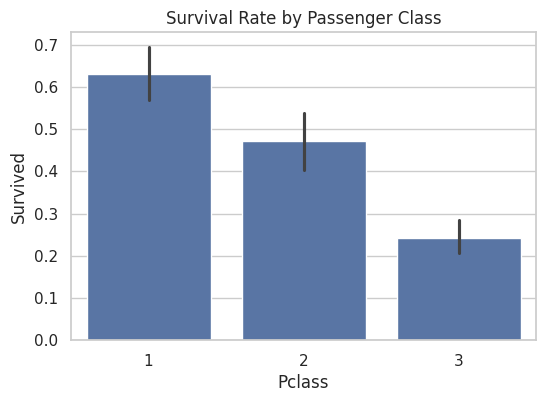

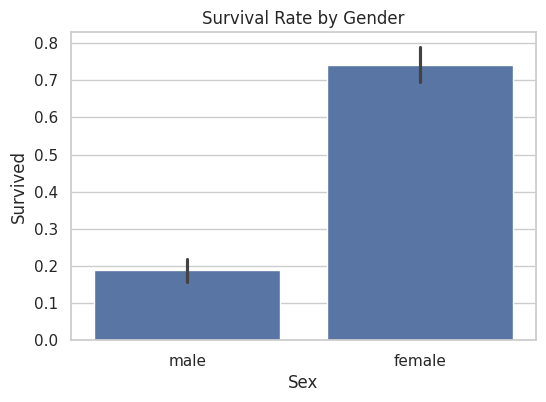

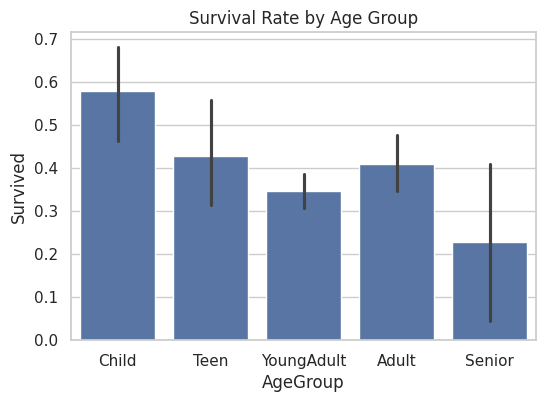

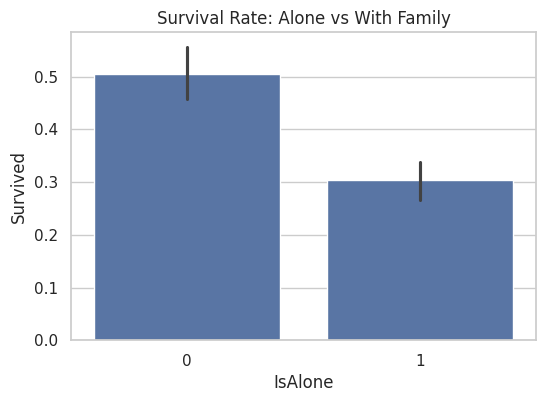

In [23]:


# --- 7. Feature Engineering ---
# Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Is Alone
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 1, "IsAlone"] = 0

# Age Groups (categorical)
df["AgeGroup"] = pd.cut(df["Age_grouped"], bins=[0,12,18,35,60,80],
                        labels=["Child","Teen","YoungAdult","Adult","Senior"])

# Fare Bins
df["FareBin"] = pd.qcut(df["Fare"], 4, labels=["Low","Med","High","VeryHigh"])

print("\nFeature Engineering Preview:")
#print(df[["Age","Age_grouped","FamilySize","IsAlone","AgeGroup","FareBin"]].head())
df_head = df[["Age","Age_grouped","FamilySize","IsAlone","AgeGroup","FareBin"]].head()
display(df_head)

# --- 8. Visualizations ---
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.title("Survival Rate by Age Group")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="IsAlone", y="Survived", data=df)
plt.title("Survival Rate: Alone vs With Family")
plt.show()

# Assignment Due 23 September 2025

**Instructions:**  After completing your assignments upload the notebook to your GitHub repo and email the link to me  
1. Count missing values for all attributes and discuss which could be safely imputed vs dropped.
2. Try imputation by 'Sex' groups instead of 'Pclass'. Compare results.
3. Extract and create a new feature Title from name, here is why it is useful:

- Social Status & Class
  + Titles like Mr, Mrs, Miss, Master often correlate with gender, age, and social class.
  + Example: Master usually refers to young boys.

- Gender Information
  + The dataset already has Sex, but Title gives a more detailed view:
  + Miss → unmarried female
  + Mrs → married female  

This can capture cultural priorities (e.g., families prioritizing mothers and children during evacuation).

- Age Proxy (when missing)
  + If Age is missing, the Title gives a strong clue:
      - Master → child
      - Miss/Mrs → adult female
      - Dr, Rev, Col → older/adult males
This makes it a good helper for imputation of Age.

- Survival Patterns
  + Historically, certain groups had better chances:
    - Children (Master) → often prioritized
    - Women (Miss, Mrs) → “women and children first”
    - Aristocratic or rare titles (Lady, Sir, Countess) → often wealthy, sometimes better access to lifeboats

